In [1]:
library(lubridate) # Extract month,year,day from date column
library(dplyr) # subset function
library(ggplot2)


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date



Attaching package: 'dplyr'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [2]:
ridership = read.csv("../../data/raw/ridership-19-20.csv")

In [40]:
head(ridership)

,servicedate,halfhour,locationid,stationname,route_or_line,noninteraction_type,ungated_type,rawtaps_split,Year,Month,Day
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
1,2020-02-13,2020-02-13 19:30:00,1006,Wollaston,Red Line,Faregate,Heavy Rail,12.0,2020,2,13
2,2020-02-13,2020-02-13 19:30:00,1007,Quincy Center,Red Line,Faregate,Heavy Rail,60.0,2020,2,13
3,2020-02-13,2020-02-13 19:30:00,1009,South Station,Red Line,Faregate,Heavy Rail,364.7,2020,2,13
4,2020-02-13,2020-02-13 19:30:00,2106,Charles/MGH,Red Line,Faregate,Heavy Rail,292.0,2020,2,13
5,2020-02-13,2020-02-13 19:30:00,3007,Assembly,Orange Line,Faregate,Heavy Rail,120.0,2020,2,13
6,2020-02-13,2020-02-13 19:30:00,1010,Maverick,Blue Line,Faregate,Heavy Rail,109.0,2020,2,13


In [3]:
# Add time scale columns
ridership$Year = year(ridership$servicedate)
ridership$Month = month(ridership$servicedate)
ridership$Day = day(ridership$servicedate)

## Ridership analysis for a given year

In [23]:
png("../../figures/ridership-time-series.png",height= 1500,width=7000,res=360)
ggplot(data=ridership, aes(x=as.Date(servicedate), y=rawtaps_split))+scale_x_date(date_labels = "%Y %b")+
 labs(title = "Daily ridership time series", y = "Ridership",x = "Month")+geom_line(color="#69b3a2")+
 theme(axis.text=element_text(size=15),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 guides(fill=FALSE)
dev.off()

png 
  2

In [46]:
aggdata <- aggregate(ridership_origin$rawtaps_split,by=list(ridership_origin$Month),FUN=sum,na.rm=TRUE)

In [47]:
aggdata

Group.1,x
<dbl>,<dbl>
1,11835636
2,11203308
3,6098960
4,1003722
5,1146758
6,1896473
7,2651954
8,2946578
9,3478013


In [43]:
ridership_origin = subset(ridership,ridership$Year == 2020,select = c(Year,Month,Day,route_or_line,servicedate,rawtaps_split))

In [37]:
ridership_analysis = function(year){
    ridership_origin = subset(ridership,ridership$Year == year,select = c(Year,Month,Day,route_or_line,servicedate,rawtaps_split))
    ridership_month_average = tapply(ridership_origin$rawtaps_split,ridership_origin$Month,mean)
    ridership_month_sum = tapply(ridership_origin$rawtaps_split,ridership_origin$Month,sum)
    ridership_table = data.frame(month = c(1,2,3,4,5,6,7,8,9,10,11,12),ridership_month_average,ridership_month_sum)
    # pLot monthly riership
    p = ggplot(data=ridership_table, aes(x=factor(month), y=ridership_month_sum/1000000，fill=factor(month)))+ geom_bar(stat = "identity")+
    labs(title = "2020 total Monthly ridership ", y = "Ridership (million)",x = "Month")+
    theme(axis.text=element_text(size=15),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
    guides(fill=FALSE)
    return(p)
}

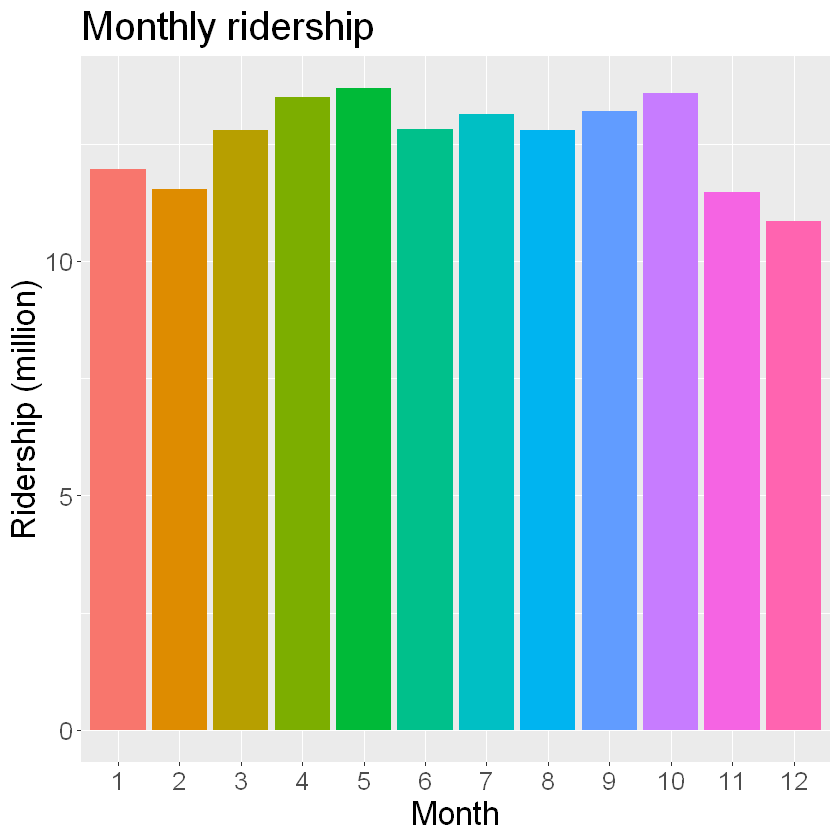

In [29]:
ridership_analysis(2019)

In [15]:
ridership_table

ERROR: Error in eval(expr, envir, enclos): object 'ridership_table' not found


In [38]:
png("../../figures/2020-monthly-ridership.png",height= 1500,width=2000,res=360)
ridership_analysis(2020)
dev.off()

png 
  2

In [ ]:
ggplot(data=ridership_table, aes(x=factor（month）, y=ridership_month_average，fill=factor(month)))+ geom_bar(stat = "identity")+
    labs(title = "Monthly average ridership ", y = "Ridership",x = "Month")+
    theme(axis.text=element_text(size=15),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
    guides(fill=FALSE)

In [ ]:
# Yearly/daily/hourly (not sure necessary or not)
# Point:Ridership data could be used to define peak hour and off peak
# Some metrics regarding ridership.(ridership/mile and ridership/hour)
